In [1]:
import pandas as pd
%matplotlib inline
#notebook
import numpy as np
import matplotlib.pyplot as plt
import plotto
import imp

%run plots_test.ipynb

imp.reload(plotto)
ureg = plotto.ureg()
simul = plotto.query("/tmp/antonio/magneticum.sql.faster")
ureg.define('hubble = %f'%(simul("select h from simulation").h[0]))



In [2]:
simul ("""
            select snap.id as snap_id,*
            from simulation
            inner join snap on snap.simulation_id=simulation.id
            inner join (
                select fof.snap_id as id,count(*) as count
                from fof
                where resolvness > 0
                group by fof.snap_id
            ) as A on A.id = snap.id
       """)


,snap_id,id,name,box_size,h,id,name,redshift,a,simulation_id,tag,id,count
0,1,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,1,037,2.220446e-16,1.000000,1,z0,1,40076
1,2,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,2,025,4.661420e-01,0.682062,1,z05,2,9542
2,3,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,3,014,1.166085e+00,0.461662,1,z1,3,348
3,4,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,4,012,1.467036e+00,0.405345,1,z15,4,53
4,5,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,5,037,2.220446e-16,1.000000,2,z0,5,44537
5,6,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,6,025,4.701941e-01,0.680182,2,z05,6,11311
6,7,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,7,014,1.178895e+00,0.458948,2,z1,7,486
7,8,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,8,012,1.477581e+00,0.403619,2,z15,8,93
8,9,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,9,010,1.980082e+00,0.335561,2,z2,9,9
9,10,3,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,10,031,2.520891e-01,0.798665,3,z0,10,156110


In [80]:
all_df_z0 = simul ("""
    select  fof.mcri, fof.tgas0, pp.* , fof.r5cc, fof.rvir, fof.m5cc, fof.glen, fof.rcri, fof.id_cluster as fof_id_cluster, pp.id_cluster as pp_id_cluster
    from pp
    inner join fof on fof.snap_id=pp.snap_id and fof.id_cluster = pp.id_cluster
    inner join snap on  pp.snap_id = snap.id
    inner join simulation on simulation.id = snap.simulation_id
    and instr( simulation.name,'_dm')<=0
     
    and snap.tag='z0'
    --and snap.id= 5
    """)



In [3]:
all_fof_z0 = simul ("""
    select  fof.*
    from fof
    inner join snap on  fof.snap_id = snap.id
    and snap.id= 5
    """)

all_pp_z0 = simul ("""
    select  pp.*
    from pp
    inner join snap on   pp.snap_id = snap.id
    and snap.id= 5
    """)

In [4]:

display(len(all_df_z0))



display(np.max(all_df_z0.mcri))
display(np.max(all_df_z0[all_df_z0.c200c>0].mcri))


display(all_fof_z0[all_fof_z0.id_cluster==0])
display(all_df_z0[all_df_z0.id_cluster==0])

display(all_pp_z0[all_pp_z0.id_cluster==0])

149921

385337.78125

385337.78125

,id,id_cluster,snap_id,i_file,i_in_file,resolvness,fsub,ncon,gpos0,gpos1,...,bgma,mgas0,mgas1,mgas2,mgas3,mgas4,mgas5,mgas6,bgra,mcri
0,89617,0,5,0,0,1,0.0,0.0,None,None,...,493860.15625,None,None,None,None,None,None,None,3521.291992,385337.78125


,mcri,tgas0,id,snap_id,id_cluster,c200c,c200c_rho0,c200c_rs,fossilness_mcent,fossilness_msat,...,virialness_k,virialness_w_gas,virialness_es_gas,virialness_k_gas,virialness_eta,virialness_beta,glen,rcri,fof_id_cluster,pp_id_cluster
0,385337.781250,None,0,5,0,3.395412,0.029316,750.899772,1398.46000,160.40500,...,None,None,None,None,None,None,622937,2549.614258,0,0
44537,180067.687500,None,786344,10,0,1.769083,0.005203,1295.776409,1694.98000,201.54800,...,None,None,None,None,None,None,5280553,2292.336426,0,0
148076,13460.439453,None,6721573,15,0,5.870094,0.084700,148.590026,256.39838,35.75468,...,None,None,None,None,None,None,9117815,872.237427,0,0


,id,snap_id,id_cluster,c200c,c200c_rho0,c200c_rs,fossilness_mcent,fossilness_msat,fossilness,virialness_w,virialness_es,virialness_k,virialness_w_gas,virialness_es_gas,virialness_k_gas,virialness_eta,virialness_beta
0,0,5,0,3.395412,0.029316,750.899772,1398.46,160.405,8.71831,None,None,None,None,None,None,None,None


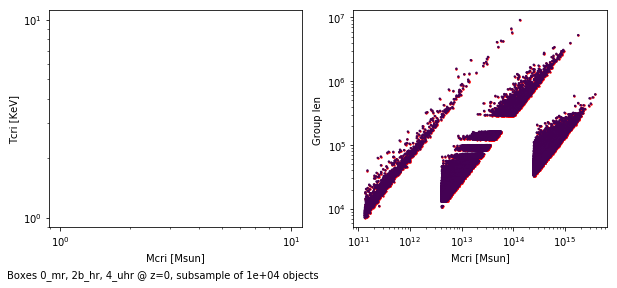

In [6]:
n_subsample = 10000
rdf = all_df_z0#.sample(n=n_subsample)
f,a12 = plt.subplots(1,2, figsize=(10,4))
a1=a12[0]
a2=a12[1]
f.subplots_adjust(hspace=0)
a1.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.tgas0,c=rdf.c200c, s=2) #c=rdf.redshift, s=2)
a1.set_xscale('log')
a1.set_yscale('log')
a1.set_xlabel("Mcri [Msun]")
a1.set_ylabel("Tcri [KeV]")

a2.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.glen,color="red", s=2)
a2.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.glen,c=rdf.c200c>0, s=2) #c=rdf.redshift, s=2)
a2.set_xscale('log')
a2.set_yscale('log')
a2.set_xlabel("Mcri [Msun]")
a2.set_ylabel("Group len ")
f.text(.5, -0.05, "Boxes 0_mr, 2b_hr, 4_uhr @ z=0, subsample of %.0e objects"%(n_subsample), ha='right')

None

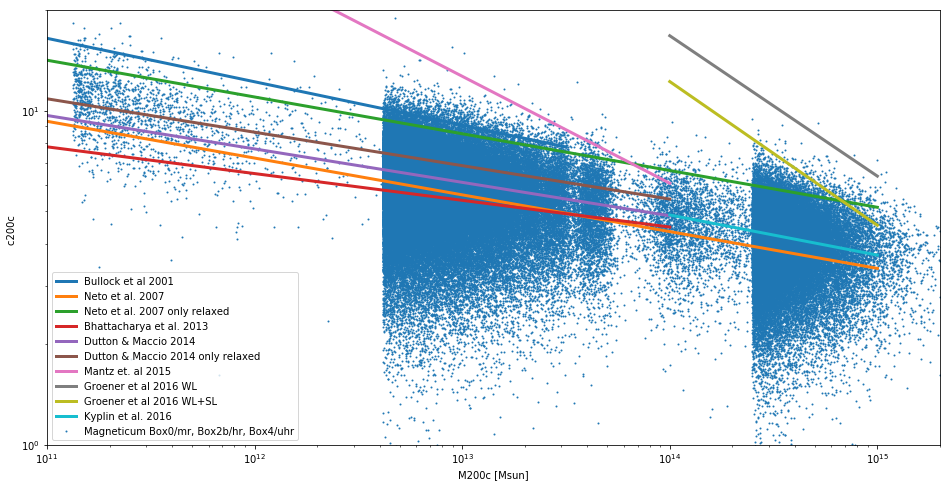

In [7]:

    
fig,a = plt.subplots(1,1, figsize=(16,8))
df=all_df_z0#.sample(n=100000)
#colormap, norm = plotto.gen_supermap(all_df_z0.fossilness)
a.scatter((ureg.gmass*df.mcri).to('Msun'),df.c200c, s=1, label='Magneticum Box0/mr, Box2b/hr, Box4/uhr') #c=rdf.redshift, s=2)

for interp_observation_name in interp_observations:
        obs = interp_observations[interp_observation_name]
        x = np.logspace(obs.xrange[0],obs.xrange[1],3)
        
        y = sc(obs.c8e14,obs.B)(x)
        a.plot(x,y, linewidth=3, label=interp_observation_name)

set_Mc_lims(a)


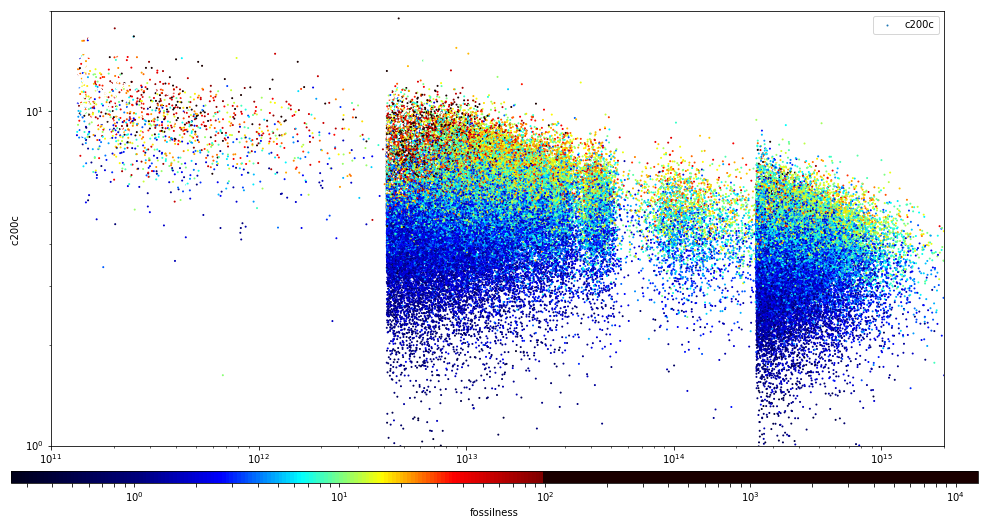

In [8]:
fig,a = plt.subplots(1,1, figsize=(16,8))
df=all_df_z0#.sample(n=100000)
colormap, norm = plotto.gen_supermap(all_df_z0.fossilness)
scatter = a.scatter((ureg.gmass*df.mcri).to('Msun'),df.c200c, c= df.fossilness, s=1, cmap=colormap, norm=norm) #c=rdf.redshift, s=2)

scatter = a.scatter((ureg.gmass*df.mcri).to('Msun'),df.c200c, c= df.fossilness, s=1, cmap=colormap, norm=norm) #c=rdf.redshift, s=2)


a.errorbar(pratt.M200, pratt.c200c, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')

cbar_ax = fig.add_axes([0.09, 0.06, 0.84, 0.02])
fig.colorbar(scatter, label="fossilness",cax=cbar_ax,  orientation='horizontal')
set_Mc_lims(a)

In [82]:
from IPython.display import display



for sub in subs.iterrows():
    sub = sub[1]
    m500c, c500c = convert_mass_and_concentration( 500., 200., sub.c200c, sub.mcri) 
    c500c_test = sub.c200c/sub.rcri*sub.r5cc
    
    display("mcri=%.2e nfw(rcri)=%.2e M/rcri3=%.2e M500/r5003=%.2e c500c_BC= %.2f±%.1e c500c_test= %.2f"%(sub.mcri, NFW(sub.rcri, sub.c200c_rho0, sub.c200c_rs), sub.mcri/sub.rcri**3., 2/5* sub.m5cc/sub.r5cc**3., c500c,error,c500c_test))
    display([c500c, cdelta1(500.,200., sub.c200c)(c500c),c500c_test, cdelta1(500.,200., sub.c200c)(c500c_test)])
    display([sub.mcri/sub.m5cc,f_NFW(sub.c200c)/f_NFW(c500c_test)])

'mcri=1.32e+05 nfw(rcri)=4.71e-04 M/rcri3=2.33e-05 M500/r5003=2.33e-05 c500c_BC= 1.83±3.5e-04 c500c_test= 1.82'

[1.8314370075064013,
 1.8314318164096541,
 1.8196063952760655,
 1.8272302731974128]

[1.5887275796315596, 1.569032810552935]

'mcri=1.31e+05 nfw(rcri)=4.58e-04 M/rcri3=2.33e-05 M500/r5003=2.33e-05 c500c_BC= 2.26±3.5e-04 c500c_test= 2.35'

[2.257093433512222, 2.2570906327012366, 2.3483439041138636, 2.28641583061191]

[1.3208373099322686, 1.4311953721240023]

In [ ]:
xdf = simul ("""
select fof.id_cluster,fof.mcri from fof 
inner join galaxy on galaxy.id_cluster = fof.id_cluster and galaxy.snap_id = fof.snap_id
 where   galaxy.snap_id = 1 and fof.snap_id = 1 and
 fof.mcri>.7e15/1e10 and
  galaxy.msub>fof.mcri*0.1

""")




In [ ]:
def counts(df, n):
    ids, counts = np.unique(df.id_cluster,return_counts =True)
    count = len(ids[counts>=n])
    print("FoF groups with %.2e < Mcri/h < %.2e and with %d massive galaxies: %d "%(np.min(df.mcri)*1e10, np.max(df.mcri)*1e10, n, count))

counts(xdf, 3)
counts(xdf, 4)
counts(xdf, 5)